# CAROLINE KINYANJUI 
#EEGR750:TRUSTWORTHY MACHINE LEARNING
#Instructor:Dr.Osuagwu 
#FINAL PROJECT


### Importing the neccessary libraries needed to create the project 

In [131]:
#Import neccessary Libraries 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 

from PIL import Image 
import sys

#Keras imports 
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import LeakyReLU

# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.regularizers import l2

#tensorflow privacy
#imports the membership inference attack 
import tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.membership_inference_attack as mia
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import AttackInputData
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import SlicingSpec
from tensorflow_privacy.privacy.privacy_tests.membership_inference_attack.data_structures import AttackType


**Loading the Cifar10 datasets 
CIFAR10 is a commonly used dataset for object classification that consists of 32 by 32 color photos from 10 different object classes. 
The classes include: "Airplane," "Automobile," "Bird," "Cat," "Deer," "Dog," "Frog," "Horse," "Ship," and "Truck." 
There are 10,000 test images and 50,000 training images**


In [132]:
#Examining the data 
# 50000 training and 10000 test images in the dataset. 
#The images have a structure of (32,32,3) which correspond to (width, height, RGB).
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#The shape attribute shows the number of items in each dimension
#number of rows and columns
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)


Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


##**The shape attribute shows the number of items in each dimension. we reshape to get one dimension.**

In [133]:
y_train = y_train.reshape(-1,)
print('Train shape:',y_train.shape)
y_test = y_test.reshape(-1,)
print('Test Shape:',y_test.shape)

Train shape: (50000,)
Test Shape: (10000,)


#**We use the unique function to find the unique elements of the array. It will return the sorted unique elements of the array.**


In [134]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


#**There are 10 classes in the dataset**

In [135]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog" ,"frog", "horse", "ship", "truck"]

#**We prepare the dataset for training. First we transform the data into one-hot encoded vectors. 
Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
This means that categorical data must be converted to a numerical form, this involves One-Hot Encoding.** 

In [136]:
#Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples. 
#We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input.
#When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

#x_train = np.reshape(x_train,(50000,3072))
#x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

x_train /= 255
x_test /= 255




In [137]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
After conversion to one-hot: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


##**Display the first 25 images in the training set.** 

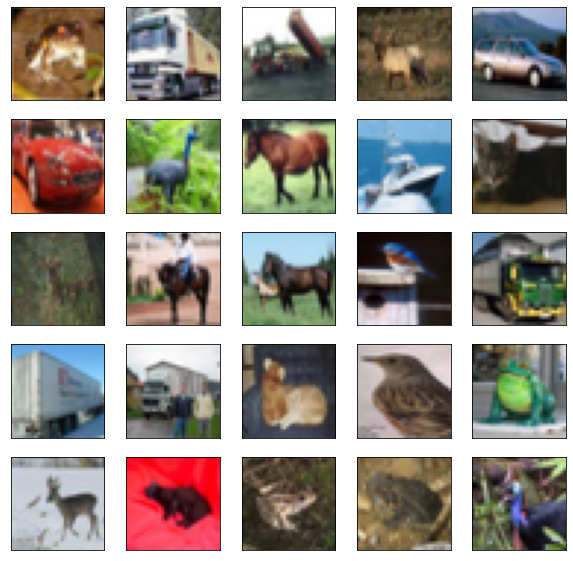

In [138]:
#Displaying 25 images
#We have 5 rows and 5 columns 
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='binary')
plt.show()

Text(0.5, 1.0, 'Ground Truth : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

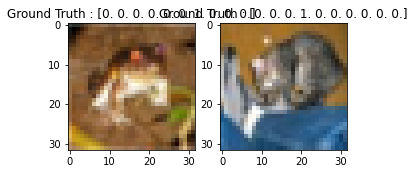

In [139]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

#**We create a function to load the dataset and prepare the dataset for trainig**

In [140]:
def load_cifar10():
  """Loads MNIST-Dataset and preprocesses to combine training and test data."""
  # load the existing CIFAR10 dataset that comes in form of traing + test data and labels
  (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

  #Normalize training dataset 
  # scale the images from color values 0-255 to numbers from 0-1 to help the training process  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train = x_train/ 255.
  x_test = x_test / 255.

  # cifar10 labels come one-hot encoded, there
  y_train_one_hot = to_categorical(y_train)
  y_test_one_hot = to_categorical(y_test)

  y_train = y_train.flatten()
  y_test = y_test.flatten() 
    
  return x_train, y_train, x_test, y_test

In [141]:
#One-hot encoded 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [142]:
#Load the data 
x_train, y_train, x_test, y_test = load_cifar10()

In [143]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000,)
Testing data shape :  (10000, 32, 32, 3) (10000,)


#**The Convolutional Neural Network(CNN). We use a CNN with three convolution layers followed by two densely connected layers and an output layer dense layer of size respectively 10 and 128 for CIFAR-10 dataset.. Then, we use ReLU as the activation function for hidden layers and softmax for the output layer. As, we use the standard categorical cross-entropy loss.**

In [144]:
#Train the model using convolutional neural network
Cifar10_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#**Compile the CNN model**

In [145]:
Cifar10_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics =['accuracy']) 

In [146]:
Cifar10_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 64)        

#**To evaluate the model, we used accuracy metrics. We first evaluate it using 10 epochs.**

In [147]:
#Cifar10_train = Cifar10_model.fit(train_data, train_labels,validation_data=(x_test,y_test),batch_size=128, epochs=50)
Cifar10_train_epochs10 = Cifar10_model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=128, epochs=10)

Epoch 1/10


C:\Users\Kinya\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 38s 94ms/step - loss: 1.7095 - accuracy: 0.3745 - val_loss: 1.4517 - val_accuracy: 0.4727
Epoch 2/10
391/391 [==============================] - 39s 99ms/step - loss: 1.3567 - accuracy: 0.5157 - val_loss: 1.3771 - val_accuracy: 0.5181
Epoch 3/10
391/391 [==============================] - 41s 106ms/step - loss: 1.2238 - accuracy: 0.5651 - val_loss: 1.1632 - val_accuracy: 0.5860
Epoch 4/10
391/391 [==============================] - 42s 106ms/step - loss: 1.1234 - accuracy: 0.6043 - val_loss: 1.1264 - val_accuracy: 0.6062
Epoch 5/10
391/391 [==============================] - 42s 107ms/step - loss: 1.0505 - accuracy: 0.6320 - val_loss: 1.0407 - val_accuracy: 0.6369
Epoch 6/10
391/391 [==============================] - 42s 109ms/step - loss: 0.9848 - accuracy: 0.6549 - val_loss: 1.0158 - val_accuracy: 0.6451
Epoch 7/10
391/391 [==============================] - 42s 108ms/step - loss: 0.9429 - accuracy: 0.6695 - val_loss: 0.9735 - val_accuracy: 0.667

#**When training the model for 10 epochs, we reach a training accuracy of around 73%
A validation accuracy of around 68%.**

In [148]:
#returns you a list of the epoch wise training accuracy.
Cifar10_train_epochs10.history['accuracy']

[0.37450000643730164,
 0.515720009803772,
 0.5651199817657471,
 0.6042600274085999,
 0.6320400238037109,
 0.6549400091171265,
 0.6694599986076355,
 0.6836400032043457,
 0.6998199820518494,
 0.7163800001144409]

Text(0, 0.5, 'Accuracy')

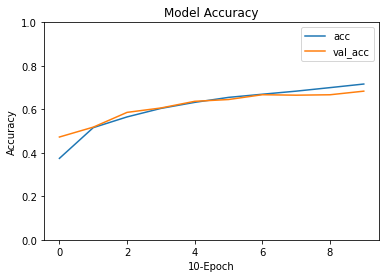

In [149]:
# plot accuracy for the first model
plt.plot(Cifar10_train_epochs10.history['accuracy'], label='acc')
plt.plot(Cifar10_train_epochs10.history['val_accuracy'], label='val_acc')
plt.legend();
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.xlabel("10-Epoch")
plt.ylabel("Accuracy")

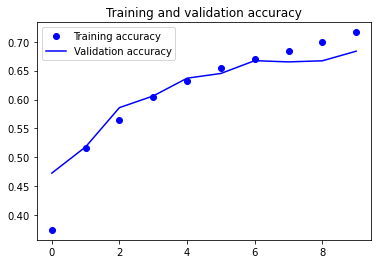

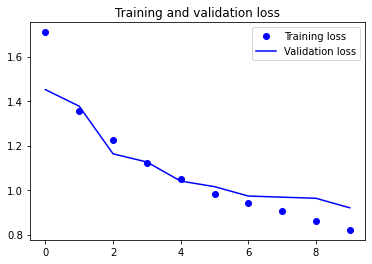

In [150]:
accuracy = Cifar10_train_epochs10.history['accuracy']
val_accuracy = Cifar10_train_epochs10.history['val_accuracy']
loss = Cifar10_train_epochs10.history['loss']
val_loss = Cifar10_train_epochs10.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [151]:
#find your final test accuracy you should use the evaluate attribute on the model object
Cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9206 - accuracy: 0.6836


[0.9206433296203613, 0.6836000084877014]

In [152]:
x_train, y_train, x_test, y_test = load_cifar10()
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000,)
Testing data shape :  (10000, 32, 32, 3) (10000,)


In [153]:
# since we have not specified an activation function on the last layer
# calling the predict function returns the logits
print('Predict on train...')
logits_train =Cifar10_model.predict(x_train)
print('Predict on test...')
logits_test = Cifar10_model.predict(x_test)

print('Apply softmax to get probabilities from logits...')
prob_train = tf.nn.softmax(logits_train, axis=-1)
prob_test = tf.nn.softmax(logits_test)

print('Compute losses...')
cce = tf.keras.backend.categorical_crossentropy
constant = tf.keras.backend.constant

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

loss_train = cce(constant(y_train_onehot), constant(prob_train), from_logits=False).numpy()
loss_test = cce(constant(y_test_onehot), constant(prob_test), from_logits=False).numpy()

Predict on train...
1563/1563 [==============================] - 19s 11ms/step
Predict on test...
313/313 [==============================] - 3s 10ms/step
Apply softmax to get probabilities from logits...
Compute losses...


In [154]:
# define what variables our attacker should have access to
attack_input = AttackInputData(
  logits_train = logits_train,
  logits_test = logits_test,
  loss_train = loss_train,
  loss_test = loss_test,
  labels_train = y_train,
  labels_test = y_test
)

In [155]:
# how should the data be sliced
slicing_spec = SlicingSpec(
    entire_dataset = True,
    by_class = True,
    by_percentiles = False,
    by_classification_correctness = True)

In [156]:
# define the type of attacker model that we want to use
attack_types = [
    AttackType.THRESHOLD_ATTACK,
    AttackType.LOGISTIC_REGRESSION
]

In [157]:
# run the attack
attacks_result = mia.run_attacks(attack_input=attack_input,
                                 slicing_spec=slicing_spec,
                                 attack_types=attack_types)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [158]:
print(attacks_result.summary(by_slices=True))

Best-performing attacks over all slices
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an AUC of 0.56 on slice CLASS=1
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.26 on slice CLASS=1
  THRESHOLD_ATTACK (with 5000 training and 1000 test examples) achieved a positive predictive value of 1.00 on slice CLASS=1

Best-performing attacks over slice: "Entire dataset"
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved an AUC of 0.53
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved an advantage of 0.23
  THRESHOLD_ATTACK (with 50000 training and 10000 test examples) achieved a positive predictive value of 0.97

Best-performing attacks over slice: "CLASS=0"
  THRESHOLD_ATTACK (with 5000 training and 1000 test examples) achieved an AUC of 0.53
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.06
  LOGISTIC_REGRESSION (with 500

Figure(432x288)


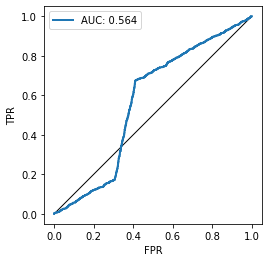

In [159]:
# plot the curve, we see that the attacker is much better than random guessing
import tensorflow_privacy.privacy.membership_inference_attack.plotting as plotting
print(plotting.plot_roc_curve(attacks_result.get_result_with_max_auc().roc_curve))

In [160]:
Cifar10_dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [161]:
Cifar10_dropout_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics =['accuracy']) 

In [162]:
Cifar10_dropout_train10 = Cifar10_dropout_model.fit(x_train, y_train,
                       validation_data=(x_test,y_test),
                       batch_size=128, 
                       epochs=10)

Epoch 1/10
391/391 [==============================] - 52s 129ms/step - loss: 2.0150 - accuracy: 0.2342 - val_loss: 1.7218 - val_accuracy: 0.3931
Epoch 2/10
391/391 [==============================] - 52s 134ms/step - loss: 1.6347 - accuracy: 0.3949 - val_loss: 1.4453 - val_accuracy: 0.4909
Epoch 3/10
391/391 [==============================] - 53s 134ms/step - loss: 1.4893 - accuracy: 0.4546 - val_loss: 1.3547 - val_accuracy: 0.5234
Epoch 4/10
391/391 [==============================] - 53s 135ms/step - loss: 1.4173 - accuracy: 0.4824 - val_loss: 1.2795 - val_accuracy: 0.5523
Epoch 5/10
391/391 [==============================] - 55s 140ms/step - loss: 1.3666 - accuracy: 0.5035 - val_loss: 1.2413 - val_accuracy: 0.5677
Epoch 6/10
391/391 [==============================] - 54s 138ms/step - loss: 1.3376 - accuracy: 0.5153 - val_loss: 1.1949 - val_accuracy: 0.5751
Epoch 7/10
391/391 [==============================] - 53s 134ms/step - loss: 1.3081 - accuracy: 0.5259 - val_loss: 1.2907 - val_ac

In [163]:
Cifar10_dropout_model.save("Cifar10_model_dropout10.h5py")

INFO:tensorflow:Assets written to: Cifar10_model_dropout10.h5py\assets


INFO:tensorflow:Assets written to: Cifar10_model_dropout10.h5py\assets


Text(0, 0.5, 'Accuracy')

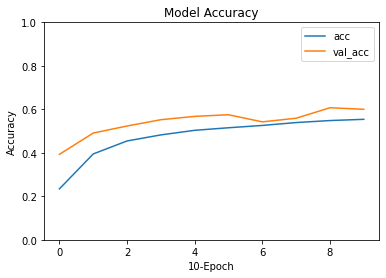

In [164]:
# plot accuracy for the first model
plt.plot(Cifar10_dropout_train10.history['accuracy'], label='acc')
plt.plot(Cifar10_dropout_train10.history['val_accuracy'], label='val_acc')
plt.legend();
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.xlabel("10-Epoch")
plt.ylabel("Accuracy")

In [165]:
Cifar10_dropout_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.1285 - accuracy: 0.6003


[1.1284767389297485, 0.6003000140190125]

In [166]:
# since we have not specified an activation function on the last layer
# calling the predict function returns the logits
print('Predict on train...')
logits_train =Cifar10_dropout_model.predict(x_train)
print('Predict on test...')
logits_test = Cifar10_dropout_model.predict(x_test)

print('Apply softmax to get probabilities from logits...')
prob_train = tf.nn.softmax(logits_train, axis=-1)
prob_test = tf.nn.softmax(logits_test)

print('Compute losses...')
cce = tf.keras.backend.categorical_crossentropy
constant = tf.keras.backend.constant

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

loss_train = cce(constant(y_train_onehot), constant(prob_train), from_logits=False).numpy()
loss_test = cce(constant(y_test_onehot), constant(prob_test), from_logits=False).numpy()

Predict on train...
1563/1563 [==============================] - 16s 10ms/step
Predict on test...
313/313 [==============================] - 3s 11ms/step
Apply softmax to get probabilities from logits...
Compute losses...


In [167]:
# define what variables our attacker should have access to
attack_input = AttackInputData(
  logits_train = logits_train,
  logits_test = logits_test,
  loss_train = loss_train,
  loss_test = loss_test,
  labels_train = y_train,
  labels_test = y_test
)

In [168]:
# how should the data be sliced
slicing_spec = SlicingSpec(
    entire_dataset = True,
    by_class = True,
    by_percentiles = False,
    by_classification_correctness = True)

In [169]:
# define the type of attacker model that we want to use
attack_types = [
    AttackType.THRESHOLD_ATTACK,
    AttackType.LOGISTIC_REGRESSION
]

In [170]:
# run the attack
attacks_result = mia.run_attacks(attack_input=attack_input,
                                 slicing_spec=slicing_spec,
                                 attack_types=attack_types)

Figure(432x288)


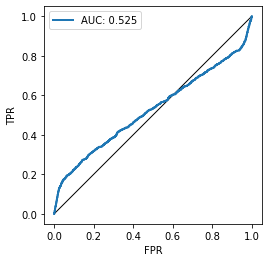

In [171]:
# plot the curve, we see that the attacker is much better than random guessing
import tensorflow_privacy.privacy.membership_inference_attack.plotting as plotting
print(plotting.plot_roc_curve(attacks_result.get_result_with_max_auc().roc_curve))

#**30 Epochs**

In [172]:
Cifar10_train_epochs30 = Cifar10_model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=128, epochs=30)

Epoch 1/30
391/391 [==============================] - 49s 125ms/step - loss: 0.7995 - accuracy: 0.7216 - val_loss: 0.9158 - val_accuracy: 0.6810
Epoch 2/30
391/391 [==============================] - 55s 141ms/step - loss: 0.7700 - accuracy: 0.7332 - val_loss: 0.8828 - val_accuracy: 0.6962
Epoch 3/30
391/391 [==============================] - 55s 141ms/step - loss: 0.7467 - accuracy: 0.7385 - val_loss: 0.9005 - val_accuracy: 0.6925
Epoch 4/30
391/391 [==============================] - 58s 148ms/step - loss: 0.7215 - accuracy: 0.7502 - val_loss: 0.8762 - val_accuracy: 0.7032
Epoch 5/30
391/391 [==============================] - 63s 160ms/step - loss: 0.6933 - accuracy: 0.7612 - val_loss: 0.9088 - val_accuracy: 0.6911
Epoch 6/30
391/391 [==============================] - 63s 162ms/step - loss: 0.6754 - accuracy: 0.7661 - val_loss: 0.8618 - val_accuracy: 0.7107
Epoch 7/30
391/391 [==============================] - 66s 169ms/step - loss: 0.6486 - accuracy: 0.7748 - val_loss: 0.8645 - val_ac

In [174]:
#returns you a list of the epoch wise training accuracy.
Cifar10_train_epochs30.history['accuracy']

[0.721560001373291,
 0.7331799864768982,
 0.7384999990463257,
 0.750220000743866,
 0.7611799836158752,
 0.7661399841308594,
 0.7748399972915649,
 0.7748799920082092,
 0.7849799990653992,
 0.7885800004005432,
 0.7964000105857849,
 0.8012999892234802,
 0.8048800230026245,
 0.8134400248527527,
 0.8166599869728088,
 0.8240799903869629,
 0.827180027961731,
 0.8319399952888489,
 0.8384000062942505,
 0.8393999934196472,
 0.8453199863433838,
 0.8511000275611877,
 0.8517400026321411,
 0.8580600023269653,
 0.8643800020217896,
 0.8646600246429443,
 0.8693000078201294,
 0.8731399774551392,
 0.877560019493103,
 0.8835200071334839]

In [175]:
Cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0897 - accuracy: 0.7162


[1.0896732807159424, 0.7161999940872192]

Text(0, 0.5, 'Accuracy')

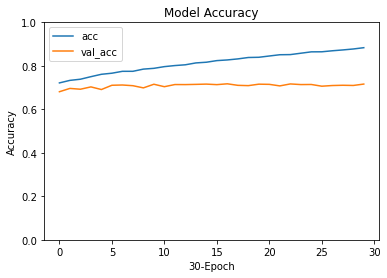

In [176]:
# plot accuracy for the first model
plt.plot(Cifar10_train_epochs30.history['accuracy'], label='acc')
plt.plot(Cifar10_train_epochs30.history['val_accuracy'], label='val_acc')
plt.legend();
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.xlabel("30-Epoch")
plt.ylabel("Accuracy")

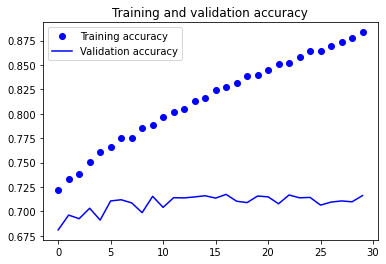

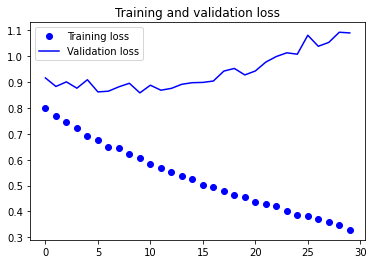

In [177]:
accuracy = Cifar10_train_epochs30.history['accuracy']
val_accuracy = Cifar10_train_epochs30.history['val_accuracy']
loss = Cifar10_train_epochs30.history['loss']
val_loss = Cifar10_train_epochs30.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [178]:
x_train, y_train, x_test, y_test = load_cifar10()
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000,)
Testing data shape :  (10000, 32, 32, 3) (10000,)


In [179]:
# since we have not specified an activation function on the last layer
# calling the predict function returns the logits
print('Predict on train...')
logits_train =Cifar10_model.predict(x_train)
print('Predict on test...')
logits_test = Cifar10_model.predict(x_test)

print('Apply softmax to get probabilities from logits...')
prob_train = tf.nn.softmax(logits_train, axis=-1)
prob_test = tf.nn.softmax(logits_test)

print('Compute losses...')
cce = tf.keras.backend.categorical_crossentropy
constant = tf.keras.backend.constant

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

loss_train = cce(constant(y_train_onehot), constant(prob_train), from_logits=False).numpy()
loss_test = cce(constant(y_test_onehot), constant(prob_test), from_logits=False).numpy()

Predict on train...
1563/1563 [==============================] - 15s 9ms/step
Predict on test...
313/313 [==============================] - 3s 9ms/step
Apply softmax to get probabilities from logits...
Compute losses...


In [180]:
# define what variables our attacker should have access to
attack_input = AttackInputData(
  logits_train = logits_train,
  logits_test = logits_test,
  loss_train = loss_train,
  loss_test = loss_test,
  labels_train = y_train,
  labels_test = y_test
)

**SlicingSpec offers you a possibility to slice your dataset. This makes sense if you want to determine the success of the membership inference attack over specific data groups or classes. According to the code you have the following options that can be set to True**

In [181]:
# how should the data be sliced
slicing_spec = SlicingSpec(
    entire_dataset = True,
    by_class = True,
    by_percentiles = False,
    by_classification_correctness = True)

In [182]:
# define the type of attacker model that we want to use
attack_types = [
    AttackType.THRESHOLD_ATTACK,
    AttackType.LOGISTIC_REGRESSION
]

In [183]:
# run the attack
attacks_result = mia.run_attacks(attack_input=attack_input,
                                 slicing_spec=slicing_spec,
                                 attack_types=attack_types)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [184]:
print(attacks_result.summary(by_slices=True))

Best-performing attacks over all slices
  THRESHOLD_ATTACK (with 4913 training and 2838 test examples) achieved an AUC of 0.73 on slice CORRECTLY_CLASSIFIED=False
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.41 on slice CLASS=9
  THRESHOLD_ATTACK (with 50000 training and 10000 test examples) achieved a positive predictive value of 1.00 on slice Entire dataset

Best-performing attacks over slice: "Entire dataset"
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved an AUC of 0.60
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved an advantage of 0.19
  THRESHOLD_ATTACK (with 50000 training and 10000 test examples) achieved a positive predictive value of 1.00

Best-performing attacks over slice: "CLASS=0"
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an AUC of 0.59
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.20
  T

Figure(432x288)


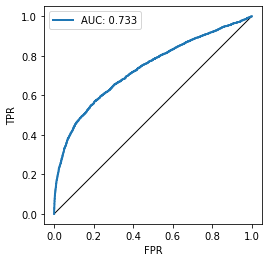

In [185]:
# plot the curve, we see that the attacker is much better than random guessing
import tensorflow_privacy.privacy.membership_inference_attack.plotting as plotting
print(plotting.plot_roc_curve(attacks_result.get_result_with_max_auc().roc_curve))

In [186]:
Cifar10_dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [187]:
Cifar10_dropout_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics =['accuracy']) 

In [188]:
Cifar10_dropout_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 6, 6, 64)         

In [189]:
Cifar10_dropout_train30 = Cifar10_dropout_model.fit(x_train, y_train,
                       validation_data=(x_test,y_test),
                       batch_size=128, 
                       epochs=30)

Epoch 1/30
391/391 [==============================] - 59s 126ms/step - loss: 1.9738 - accuracy: 0.2545 - val_loss: 1.6581 - val_accuracy: 0.4115
Epoch 2/30
391/391 [==============================] - 57s 147ms/step - loss: 1.6145 - accuracy: 0.4024 - val_loss: 1.4896 - val_accuracy: 0.4863
Epoch 3/30
391/391 [==============================] - 57s 145ms/step - loss: 1.4947 - accuracy: 0.4527 - val_loss: 1.3699 - val_accuracy: 0.5280
Epoch 4/30
391/391 [==============================] - 60s 153ms/step - loss: 1.4266 - accuracy: 0.4792 - val_loss: 1.3126 - val_accuracy: 0.5505
Epoch 5/30
391/391 [==============================] - 56s 143ms/step - loss: 1.3644 - accuracy: 0.5097 - val_loss: 1.2522 - val_accuracy: 0.5748
Epoch 6/30
391/391 [==============================] - 58s 149ms/step - loss: 1.3283 - accuracy: 0.5209 - val_loss: 1.2343 - val_accuracy: 0.5638
Epoch 7/30
391/391 [==============================] - 59s 151ms/step - loss: 1.2921 - accuracy: 0.5356 - val_loss: 1.1483 - val_ac

In [190]:
Cifar10_dropout_model.save("Cifar10_model_dropout30.h5py")

INFO:tensorflow:Assets written to: Cifar10_model_dropout30.h5py\assets


INFO:tensorflow:Assets written to: Cifar10_model_dropout30.h5py\assets


Text(0, 0.5, 'Accuracy')

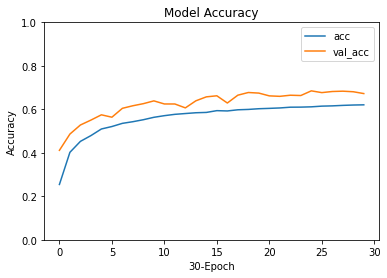

In [191]:
# plot accuracy for the first model
plt.plot(Cifar10_dropout_train30.history['accuracy'], label='acc')
plt.plot(Cifar10_dropout_train30.history['val_accuracy'], label='val_acc')
plt.legend();
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.xlabel("30-Epoch")
plt.ylabel("Accuracy")

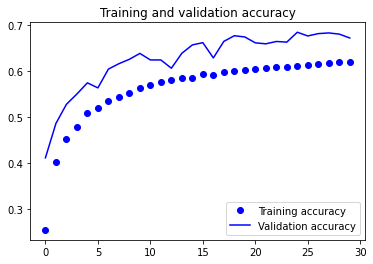

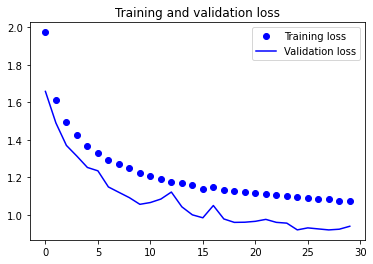

In [192]:
accuracy = Cifar10_dropout_train30.history['accuracy']
val_accuracy = Cifar10_dropout_train30.history['val_accuracy']
loss = Cifar10_dropout_train30.history['loss']
val_loss = Cifar10_dropout_train30.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [193]:
Cifar10_dropout_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9384 - accuracy: 0.6725


[0.9384164810180664, 0.6725000143051147]

In [194]:
# since we have not specified an activation function on the last layer
# calling the predict function returns the logits
print('Predict on train...')
logits_train =Cifar10_dropout_model.predict(x_train)
print('Predict on test...')
logits_test = Cifar10_dropout_model.predict(x_test)

print('Apply softmax to get probabilities from logits...')
prob_train = tf.nn.softmax(logits_train, axis=-1)
prob_test = tf.nn.softmax(logits_test)

print('Compute losses...')
cce = tf.keras.backend.categorical_crossentropy
constant = tf.keras.backend.constant

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

loss_train = cce(constant(y_train_onehot), constant(prob_train), from_logits=False).numpy()
loss_test = cce(constant(y_test_onehot), constant(prob_test), from_logits=False).numpy()

Predict on train...
1563/1563 [==============================] - 17s 11ms/step
Predict on test...
313/313 [==============================] - 3s 9ms/step
Apply softmax to get probabilities from logits...
Compute losses...


In [195]:
# define what variables our attacker should have access to
attack_input = AttackInputData(
  logits_train = logits_train,
  logits_test = logits_test,
  loss_train = loss_train,
  loss_test = loss_test,
  labels_train = y_train,
  labels_test = y_test
)

In [196]:
# how should the data be sliced
slicing_spec = SlicingSpec(
    entire_dataset = True,
    by_class = True,
    by_percentiles = False,
    by_classification_correctness = True)

In [197]:
# define the type of attacker model that we want to use
attack_types = [
    AttackType.THRESHOLD_ATTACK,
    AttackType.LOGISTIC_REGRESSION
]

In [198]:
# run the attack
attacks_result = mia.run_attacks(attack_input=attack_input,
                                 slicing_spec=slicing_spec,
                                 attack_types=attack_types)

In [199]:
print(attacks_result.summary(by_slices=True))

Best-performing attacks over all slices
  THRESHOLD_ATTACK (with 5000 training and 1000 test examples) achieved an AUC of 0.54 on slice CLASS=4
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.21 on slice CLASS=2
  THRESHOLD_ATTACK (with 5000 training and 1000 test examples) achieved a positive predictive value of 1.00 on slice CLASS=3

Best-performing attacks over slice: "Entire dataset"
  THRESHOLD_ATTACK (with 50000 training and 10000 test examples) achieved an AUC of 0.52
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved an advantage of 0.06
  LOGISTIC_REGRESSION (with 50000 training and 10000 test examples) achieved a positive predictive value of 0.99

Best-performing attacks over slice: "CLASS=0"
  THRESHOLD_ATTACK (with 5000 training and 1000 test examples) achieved an AUC of 0.51
  LOGISTIC_REGRESSION (with 5000 training and 1000 test examples) achieved an advantage of 0.16
  THRESHOLD_ATTACK (with 5000 trai

Figure(432x288)


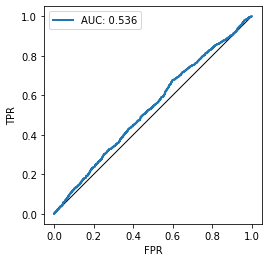

In [200]:
# plot the curve, we see that the attacker is much better than random guessing
import tensorflow_privacy.privacy.membership_inference_attack.plotting as plotting
print(plotting.plot_roc_curve(attacks_result.get_result_with_max_auc().roc_curve))